<h1 style="text-align: center;">Working with DataFrame. Data processing. Classification</h1>

###### -- Import breast_cancer dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

###### -- Fill the gaps

In [3]:
# counting the missing values across the DataFrame
missing_values = X.isnull().sum()

# sorting values in the DataFrame so that columns with more missing values will be on top
missing_values = missing_values.sort_values(ascending=False)

# displaying only columns with more than 0 missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

There's no gaps in this dataset, so the step for filling gaps is skipped.

###### -- Use Matplotlib and Seaborn for data visualization and also visualize dataframe using PCA and TSNE method

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# normalizing data using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [5]:
# fitting principal components analysis method to preprocessed DataFrame
from sklearn.decomposition import PCA

# initializing pca with 3 components
pca = PCA(n_components=3)

# fitting pca to the preprocessed data
principal_comp = pca.fit_transform(X_normalized)

# creating new DataFrame that contains 2 principal components and a column with target
pca_df = pd.DataFrame(data=principal_comp[:, :2], columns=['Principal component 1', 'Principal component 2'])
pca_df['target'] = y

pca_df

,Principal component 1,Principal component 2,target
0,1.387021,0.426895,0
1,0.462308,-0.556947,0
2,0.954621,-0.109701,0
3,1.000816,1.525089,0
4,0.626828,-0.302471,0
...,...,...,...
564,1.002840,-0.474785,0
565,0.620757,-0.517200,0
566,0.226311,-0.287946,0
567,1.677834,0.335946,0


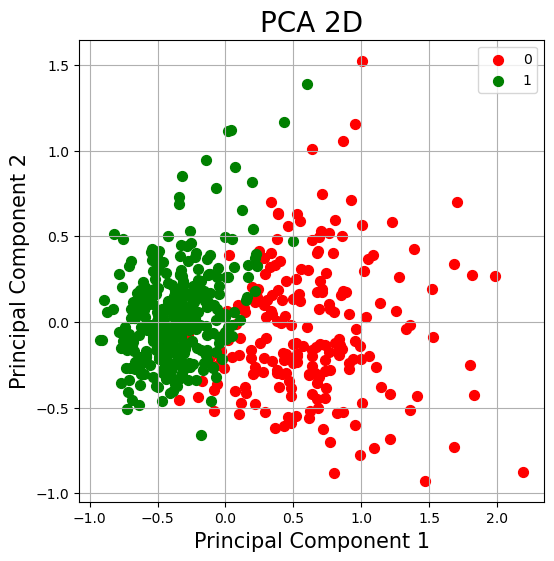

In [6]:
# visualizing the result
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA 2D', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'Principal component 1']
               , pca_df.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:
# creating new DataFrame that contains 3 principal components and a column with diagnosis
pca_df_3d = pd.DataFrame(data=principal_comp, 
                         columns=['PC1', 
                                  'PC2', 
                                  'PC3'])
pca_df_3d['target'] = y
pca_df_3d

,PC1,PC2,PC3,target
0,1.387021,0.426895,-0.541704,0
1,0.462308,-0.556947,-0.205167,0
2,0.954621,-0.109701,-0.147846,0
3,1.000816,1.525089,-0.053263,0
4,0.626828,-0.302471,-0.409334,0
...,...,...,...,...
564,1.002840,-0.474785,-0.100038,0
565,0.620757,-0.517200,0.400361,0
566,0.226311,-0.287946,0.315223,0
567,1.677834,0.335946,0.296109,0


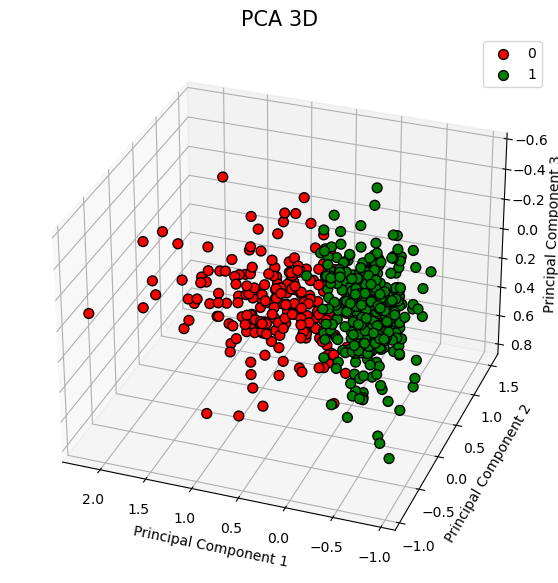

In [8]:
# visualizing the result
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_zlabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA 3D', fontsize = 15)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df_3d['target'] == target
    ax.scatter(pca_df_3d.loc[indicesToKeep, 'PC1'],
               pca_df_3d.loc[indicesToKeep, 'PC2'],
               pca_df_3d.loc[indicesToKeep, 'PC3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.view_init(elev=-150, azim=70)
ax.legend(targets)
ax.grid()

In [9]:
# fitting principal components analysis method to preprocessed DataFrame
from sklearn.decomposition import PCA

# fitting TSNE method to preprocessed DataFrame without Diagnosis column
from sklearn.manifold import TSNE

# initializing t-SNE with 2 components
tsne = TSNE(n_components=2)

# fitting t-SNE to the preprocessed data
tsne_result = tsne.fit_transform(X_normalized)

# creating new DataFrame that contains 2 TSNE features and a column with diagnosis
tsne_df_2d = pd.DataFrame(data=tsne_result, 
                          columns=['t-SNE1',
                                   't-SNE2'])
tsne_df_2d['target'] = y
tsne_df_2d

,t-SNE1,t-SNE2,target
0,35.421368,-4.183549,0
1,21.802774,9.684427,0
2,33.296814,2.320873,0
3,24.080954,-12.862599,0
4,26.820576,10.161088,0
...,...,...,...
564,35.025078,5.687910,0
565,25.878609,4.005430,0
566,11.943290,7.759172,0
567,37.483814,-0.721512,0


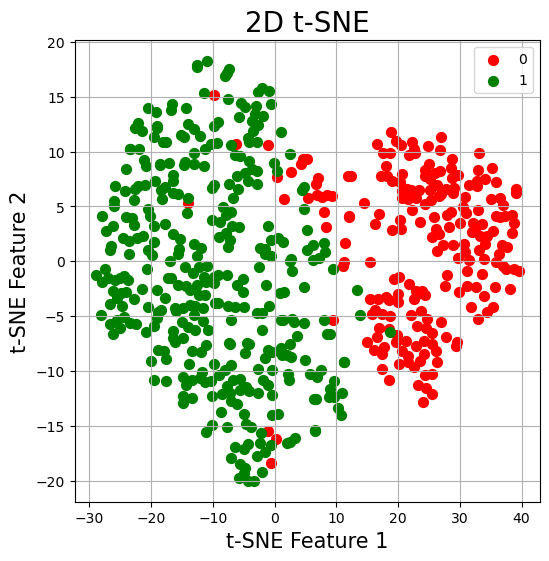

In [10]:
# visualizing the result
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE Feature 1', fontsize = 15)
ax.set_ylabel('t-SNE Feature 2', fontsize = 15)
ax.set_title('2D t-SNE', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df_2d['target'] == target
    ax.scatter(tsne_df_2d.loc[indicesToKeep, 't-SNE1']
               , tsne_df_2d.loc[indicesToKeep, 't-SNE2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
# initializing t-SNE with 3 components
tsne = TSNE(n_components=3)

# fitting t-SNE to the preprocessed data
tsne_result_3d = tsne.fit_transform(X_normalized)

tsne_df_3d = pd.DataFrame(data=tsne_result_3d, 
                         columns=['t-SNE1', 
                                  't-SNE2', 
                                  't-SNE3'])
tsne_df_3d['target'] = y
tsne_df_3d

,t-SNE1,t-SNE2,t-SNE3,target
0,10.781142,-2.422295,0.854294,0
1,7.369979,2.773175,-2.536050,0
2,10.240274,-0.166444,-0.097497,0
3,7.502128,-3.771980,4.215504,0
4,7.842930,1.395863,-3.364346,0
...,...,...,...,...
564,11.126925,1.243857,-2.157887,0
565,8.685380,4.101103,-0.908074,0
566,3.821920,3.550335,-0.744168,0
567,12.385758,-1.398986,0.324557,0


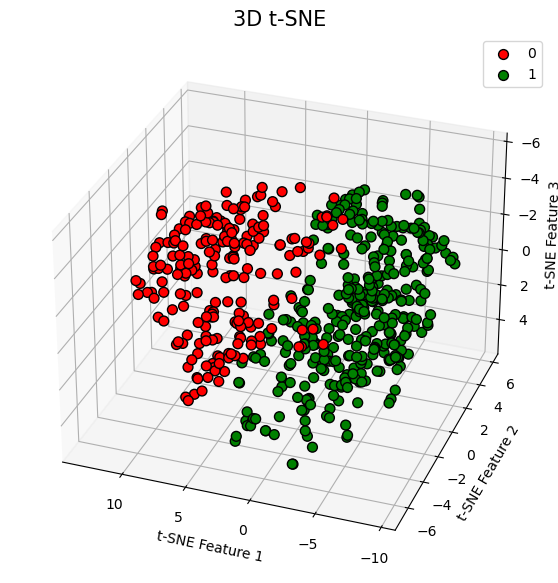

In [12]:
# visualizing the result
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('t-SNE Feature 1', fontsize = 10)
ax.set_ylabel('t-SNE Feature 2', fontsize = 10)
ax.set_zlabel('t-SNE Feature 3', fontsize = 10)
ax.set_title('3D t-SNE', fontsize = 15)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df_3d['target'] == target
    ax.scatter(tsne_df_3d.loc[indicesToKeep, 't-SNE1'],
               tsne_df_3d.loc[indicesToKeep, 't-SNE2'],
               tsne_df_3d.loc[indicesToKeep, 't-SNE3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.view_init(elev=-150, azim=70)
ax.legend(targets)
ax.grid()

In [13]:
# finding better parameters for visualizing DataFrame by TSNE method (perplexity, n_iter, learning_rate)
# let's try to make distinct clusters within the group

tsne = TSNE(n_components=2, perplexity=20, learning_rate=100, n_iter=1500)

tsne_components = tsne.fit_transform(X_normalized)

df_tsne_tuned = pd.DataFrame({
    'target': y,
    't-SNE1': tsne_components[:, 0],
    't-SNE2': tsne_components[:, 1]
})
df_tsne_tuned

,target,t-SNE1,t-SNE2
0,0,39.041225,19.137253
1,0,29.387119,-2.641785
2,0,42.662415,11.812963
3,0,25.894663,27.376741
4,0,35.388462,-0.127827
...,...,...,...
564,0,47.677723,8.501456
565,0,44.019924,0.387939
566,0,16.530777,-8.447060
567,0,46.734821,17.728331


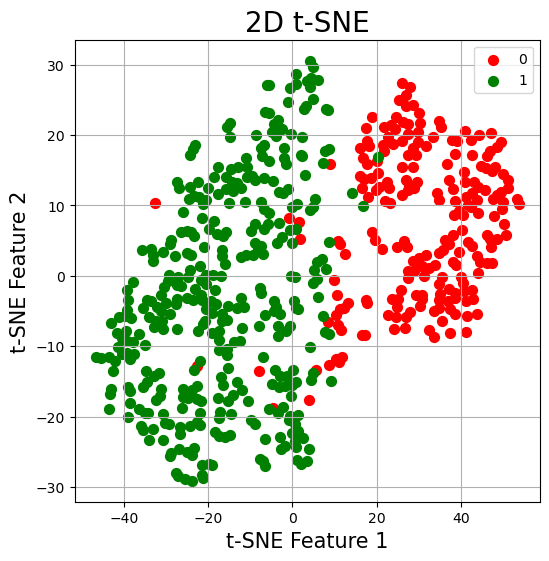

In [14]:
# visualizing the result
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE Feature 1', fontsize = 15)
ax.set_ylabel('t-SNE Feature 2', fontsize = 15)
ax.set_title('2D t-SNE', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne_tuned['target'] == target
    ax.scatter(df_tsne_tuned.loc[indicesToKeep, 't-SNE1']
               , df_tsne_tuned.loc[indicesToKeep, 't-SNE2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
# initializing t-SNE with 3 components and tuned parameters
tsne = TSNE(n_components=3, perplexity=15, learning_rate=10, n_iter=500)
#tsne = TSNE(n_components=3, perplexity=5, learning_rate=10, n_iter=500, random_state=42)

# fitting t-SNE to the preprocessed data
tuned_tsne_result_3d = tsne.fit_transform(X_normalized)

df_tsne_tuned_3d = pd.DataFrame(data=tuned_tsne_result_3d, 
                         columns=['t-SNE1', 
                                  't-SNE2', 
                                  't-SNE3'])
df_tsne_tuned_3d['target'] = y
df_tsne_tuned_3d

,t-SNE1,t-SNE2,t-SNE3,target
0,13.486289,0.910588,-2.914515,0
1,9.021919,0.625841,4.677382,0
2,12.225088,1.108238,-0.673944,0
3,6.416081,0.092317,-6.890954,0
4,9.668783,-2.020904,4.073465,0
...,...,...,...,...
564,13.036903,1.493554,2.273692,0
565,8.748181,-3.751386,-0.059006,0
566,2.954981,-1.698245,6.510228,0
567,15.364479,0.107291,-1.303061,0


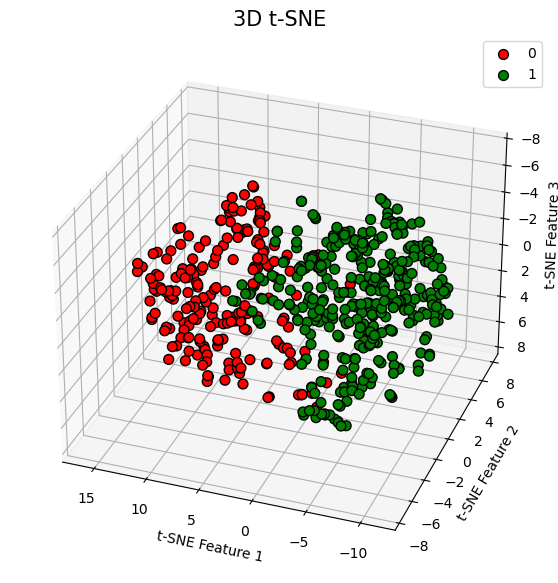

In [16]:
# visualizing the result
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('t-SNE Feature 1', fontsize = 10)
ax.set_ylabel('t-SNE Feature 2', fontsize = 10)
ax.set_zlabel('t-SNE Feature 3', fontsize = 10)
ax.set_title('3D t-SNE', fontsize = 15)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_tsne_tuned_3d['target'] == target
    ax.scatter(df_tsne_tuned_3d.loc[indicesToKeep, 't-SNE1'],
               df_tsne_tuned_3d.loc[indicesToKeep, 't-SNE2'],
               df_tsne_tuned_3d.loc[indicesToKeep, 't-SNE3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.view_init(elev=-150, azim=70)
ax.legend(targets)
ax.grid()

###### -- Apply train_test_split() to divide preprocessed dataset into train and test sets.

In [17]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("x_train, x_test:", X_train.shape, X_test.shape)
print("y_train, y_test:", y_train.shape, y_test.shape)

x_train, x_test: (455, 30) (114, 30)
y_train, y_test: (455,) (114,)


###### -- Fit different classification approaches as LogisticRegression(), KNeighborsClassifier(), SVC(), MLPClassifier(), DecisionTreeClassifier(), GaussianNB()

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    'Logistic Regression': LogisticRegression(C=1, max_iter=1000, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10, weights='uniform'),
    'Support Vector Classifier': SVC(C=10, kernel='linear', gamma=0.001, probability=True),
    'Multi-layer Perceptron Classifier': MLPClassifier(max_iter=1000, activation='tanh', alpha=0.0001, hidden_layer_sizes=(50, 50, 50), solver='sgd'),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10),
    'Gaussian Naive Bayes': GaussianNB(var_smoothing=1e-09)
}

fitted_classifiers = {}

# cross-validation for each clasifier
for name, classifier in classifiers.items():
    print(f"\n{name}")
    
    classifier.fit(X_train, y_train)
    fitted_classifiers[name] = classifier
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    
    print('Cross-validation scores (5 folds): {}'.format(cv_scores))
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
    print("Error:    %0.2f (+/- %0.2f)" % (1 - cv_scores.mean(), cv_scores.std() * 2))



Logistic Regression
Cross-validation scores (5 folds): [0.95604396 0.95604396 0.97802198 0.95604396 0.95604396]
Accuracy: 0.96 (+/- 0.02)
Error:    0.04 (+/- 0.02)

K-Nearest Neighbors
Cross-validation scores (5 folds): [0.94505495 0.96703297 1.         0.97802198 0.93406593]
Accuracy: 0.96 (+/- 0.05)
Error:    0.04 (+/- 0.05)

Support Vector Classifier
Cross-validation scores (5 folds): [0.98901099 0.96703297 1.         0.97802198 0.96703297]
Accuracy: 0.98 (+/- 0.03)
Error:    0.02 (+/- 0.03)

Multi-layer Perceptron Classifier
Cross-validation scores (5 folds): [0.98901099 0.96703297 0.97802198 0.96703297 0.96703297]
Accuracy: 0.97 (+/- 0.02)
Error:    0.03 (+/- 0.02)

Decision Tree Classifier
Cross-validation scores (5 folds): [0.94505495 0.91208791 0.94505495 0.93406593 0.93406593]
Accuracy: 0.93 (+/- 0.02)
Error:    0.07 (+/- 0.02)

Gaussian Naive Bayes
Cross-validation scores (5 folds): [0.9010989  0.96703297 0.93406593 0.93406593 0.93406593]
Accuracy: 0.93 (+/- 0.04)
Error:    

Choise of parameters for each classificator was the following:
- <b>Logistic Regression</b>: regularization parameter C is set to 1 for fitting the training data well and preventing overfitting; the maximum number of iterations for optimization is set to 1000, ensuring that the algorithm has sufficient iterations to converge; the 'liblinear' solver is used as it is suitable for small datasets.
- <b>K-Nearest Neighbors</b>: the number of neighbors considered is set to 10, which determines the neighborhood size for classification; the 'uniform' weighting is applied, where all neighbors contribute equally to the classification
- <b>Support Vector Classifier</b>: the regularization parameter C is set to 10 for a smooth decision boundary and correctly classifying training points (higher C allows the model to better fit the training data); choise of linear kernel results in a linear decision boundary; kernel coefficient is set to a small value to avoid overfitting; probability estimates are enabled for ROC AUC calculations.
- <b>Multi-layer Perceptron Classifier</b>: set a maximum of 1000 iterations for sufficient optimization attempts; activation function for hidden layers is set to 'tanh' for providing non-linearity; L2 penalty term alpha is included for regularization; the architecture consists of three hidden layers, each with 50 neurons, the choice of the solver is 'sgd' indicating stochastic gradient descent.
- <b>Decision Tree Classifier</b>: maximum depth of 5 limit the complexity of the tree to prevent overfitting, minimum number of samples required to be at a leaf node set to 5 to help control overfitting, also minimum number of samples required to split an internal node is 10 for the same purpose.
- <b>Gaussian Naive Bayes</b>: the parameter var_smoothing represents the portion of the largest variance of all features added to variances for stability, so a small value is chosen to avoid division by zero.


###### -- Predict all fitted models on train and test dataset, calculate metrics (ROC AUC, accuracy, classification report)

In [19]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

data = []

# predicting and evaluating on train and test sets
for name, classifier in fitted_classifiers.items():
    
    print(f"\n{name}")
    
    # predicting on a train set
    y_train_pred = classifier.predict(X_train)
    y_train_prob = classifier.predict_proba(X_train)[:, 1]  # Probability for ROC AUC
    
    # calculating metrics for a train set
    roc_auc_train = roc_auc_score(y_train, y_train_prob)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    report_train = classification_report(y_train, y_train_pred)
    
    print('Train set metrics:')
    print(f'ROC AUC: {roc_auc_train:.2f}')
    print(f'Accuracy: {accuracy_train:.2f}')
    print('Classification report:\n', report_train)
    
    # predicting on a test set
    y_test_pred = classifier.predict(X_test)
    y_test_prob = classifier.predict_proba(X_test)[:, 1]  # Probability for ROC AUC
    
    # calculating metrics for a test set
    roc_auc_test = roc_auc_score(y_test, y_test_prob)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred)
    
    print('\nTest set Mmetrics:')
    print(f'ROC AUC: {roc_auc_test:.2f}')
    print(f'Accuracy: {accuracy_test:.2f}')
    print('Classification report:\n', report_test)
          
    data.append([name, roc_auc_train, roc_auc_test, accuracy_train, accuracy_test])


Logistic Regression
Train set metrics:
ROC AUC: 0.99
Accuracy: 0.97
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       169
           1       0.96      0.99      0.98       286

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455


Test set Mmetrics:
ROC AUC: 1.00
Accuracy: 0.97
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


K-Nearest Neighbors
Train set metrics:
ROC AUC: 1.00
Accuracy: 0.98
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.9

In [20]:
# displaying the classification metrics in a data frame
columns = ['Classifier', 'Train ROC AUC', 'Test ROC AUC', 'Train Accuracy', 'Test Accuracy']
metrics_df = pd.DataFrame(data, columns=columns)
metrics_df.set_index('Classifier', inplace=True)
metrics_df

,Train ROC AUC,Test ROC AUC,Train Accuracy,Test Accuracy
Classifier,,,,
Logistic Regression,0.993048,0.998035,0.969231,0.973684
K-Nearest Neighbors,0.996762,0.990992,0.978022,0.964912
Support Vector Classifier,0.996483,0.997052,0.982418,0.973684
Multi-layer Perceptron Classifier,0.995159,0.997380,0.973626,0.973684
Decision Tree Classifier,0.998603,0.935473,0.978022,0.947368
Gaussian Naive Bayes,0.987400,0.997380,0.936264,0.964912


Let's consider the best classifier:
- Test ROC AUC: Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, and Multi-layer Perceptron Classifier have high test ROC AUC, which indicates the good performance in distinguishing between classes.
- Test Accuracy: Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, and Multi-layer Perceptron Classifier have high test аccuracy, that states accurate classification on the test dataset.

<b>In conclusion, Support Vector Classifier and Multi-layer Perceptron Classifier perform well across multiple metrics, both on the training and test datasets. Logistic Regression and K-Nearest Neighbors also perform well.</b>
Decision Tree Classifier has a higher ROC AUC on the training set compared to the test set, that can signal about a potential for overfitting.

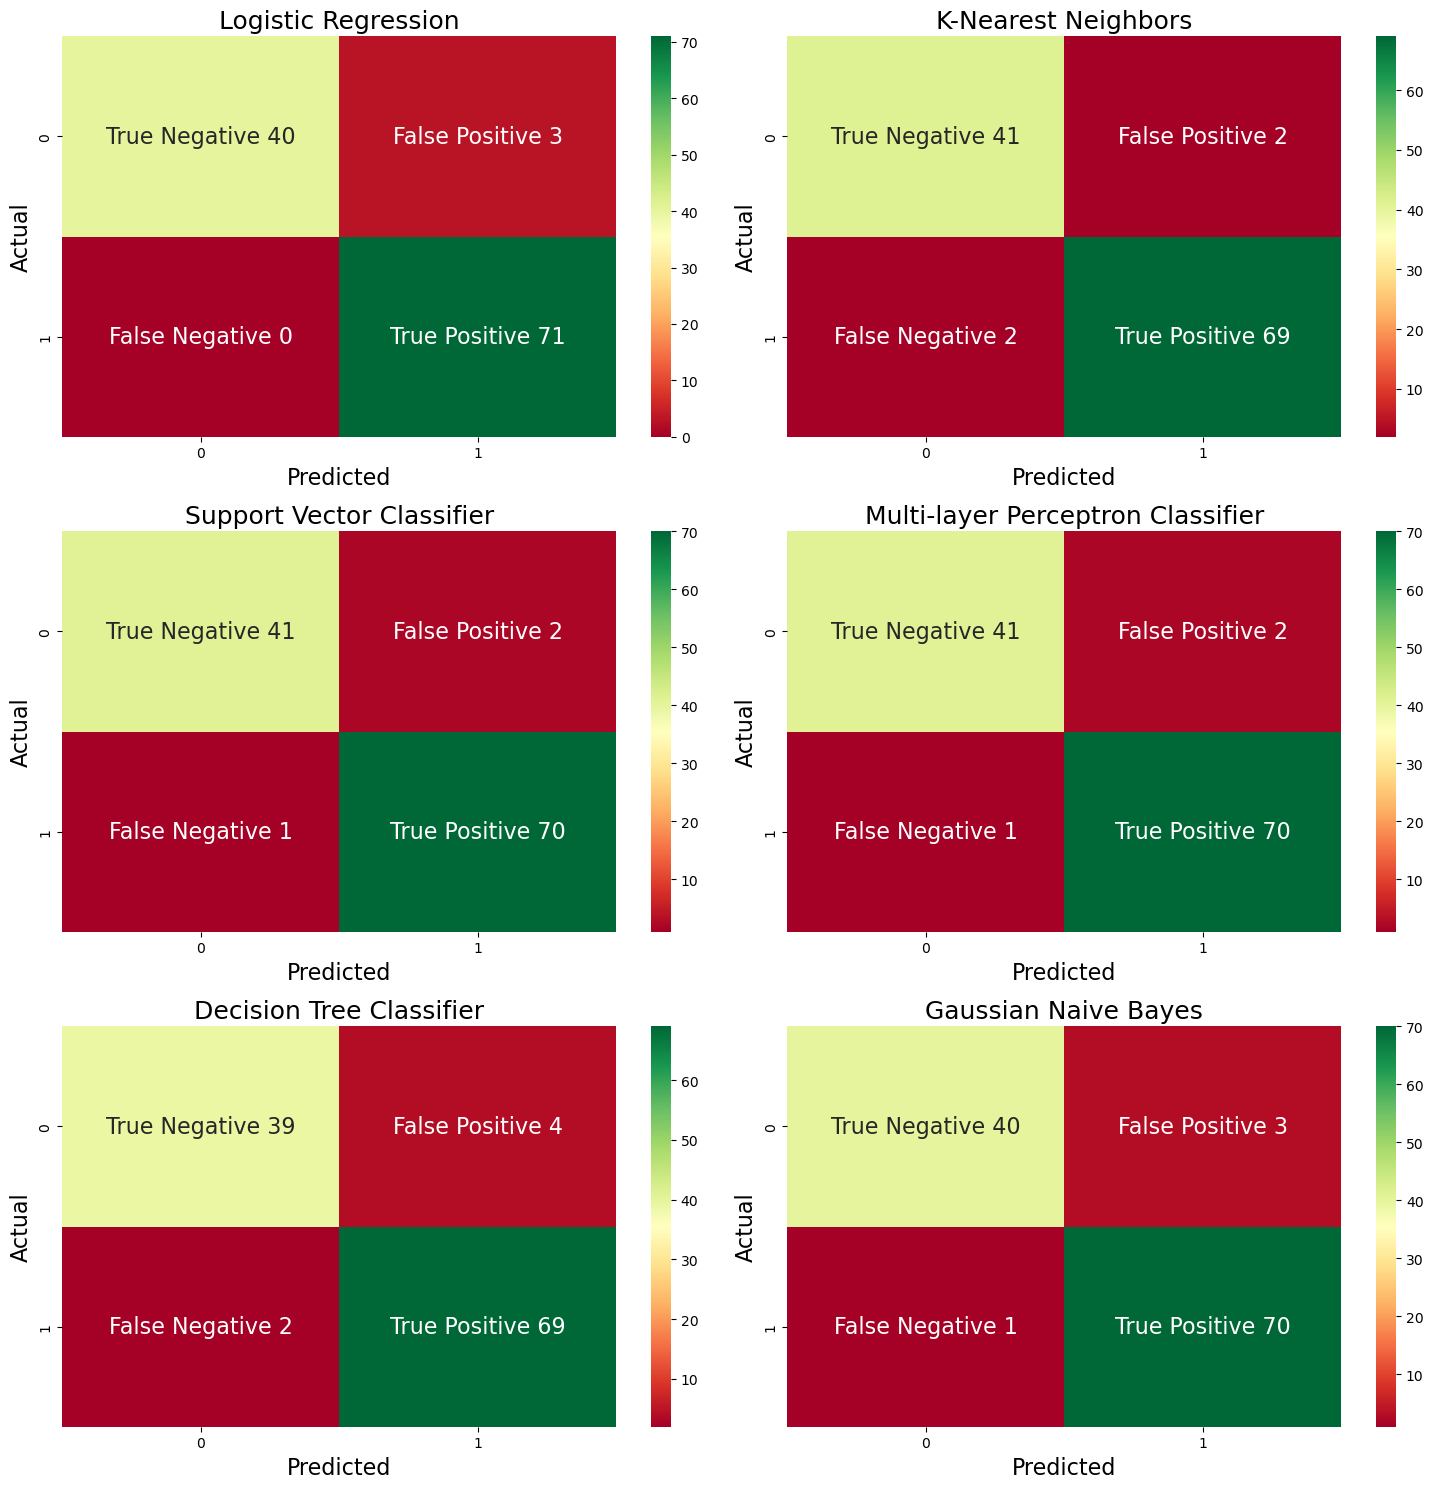

In [21]:
# let's visualize results in confusion matrices
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# calculating the number of rows needed to contain 2 confusion matrices
num_classifiers = len(fitted_classifiers)
num_rows = (num_classifiers + 1) // 2

# сreating subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# if only one row - flatten axes
if num_rows == 1:
    axes = [axes]

# displaying confusion matrices for each clasifier
for idx, (name, classifier) in enumerate(fitted_classifiers.items()):
    # predicting on the test set
    y_test_pred = classifier.predict(X_test)
    
    # calculating confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    ax = axes[idx // 2][idx % 2]
    results = cm
    strings = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
    labels = (np.asarray(["{0} {1:.0f}".format(string, value)
                          for string, value in zip(strings.flatten(), results.flatten())])
             ).reshape(2, 2)
    
    sns.heatmap(results, fmt="", cmap='RdYlGn', annot=labels, annot_kws={"size": 16}, ax=ax, cbar=True)
    ax.set_title(f'{name}', fontsize=18)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)

plt.tight_layout()
plt.show()

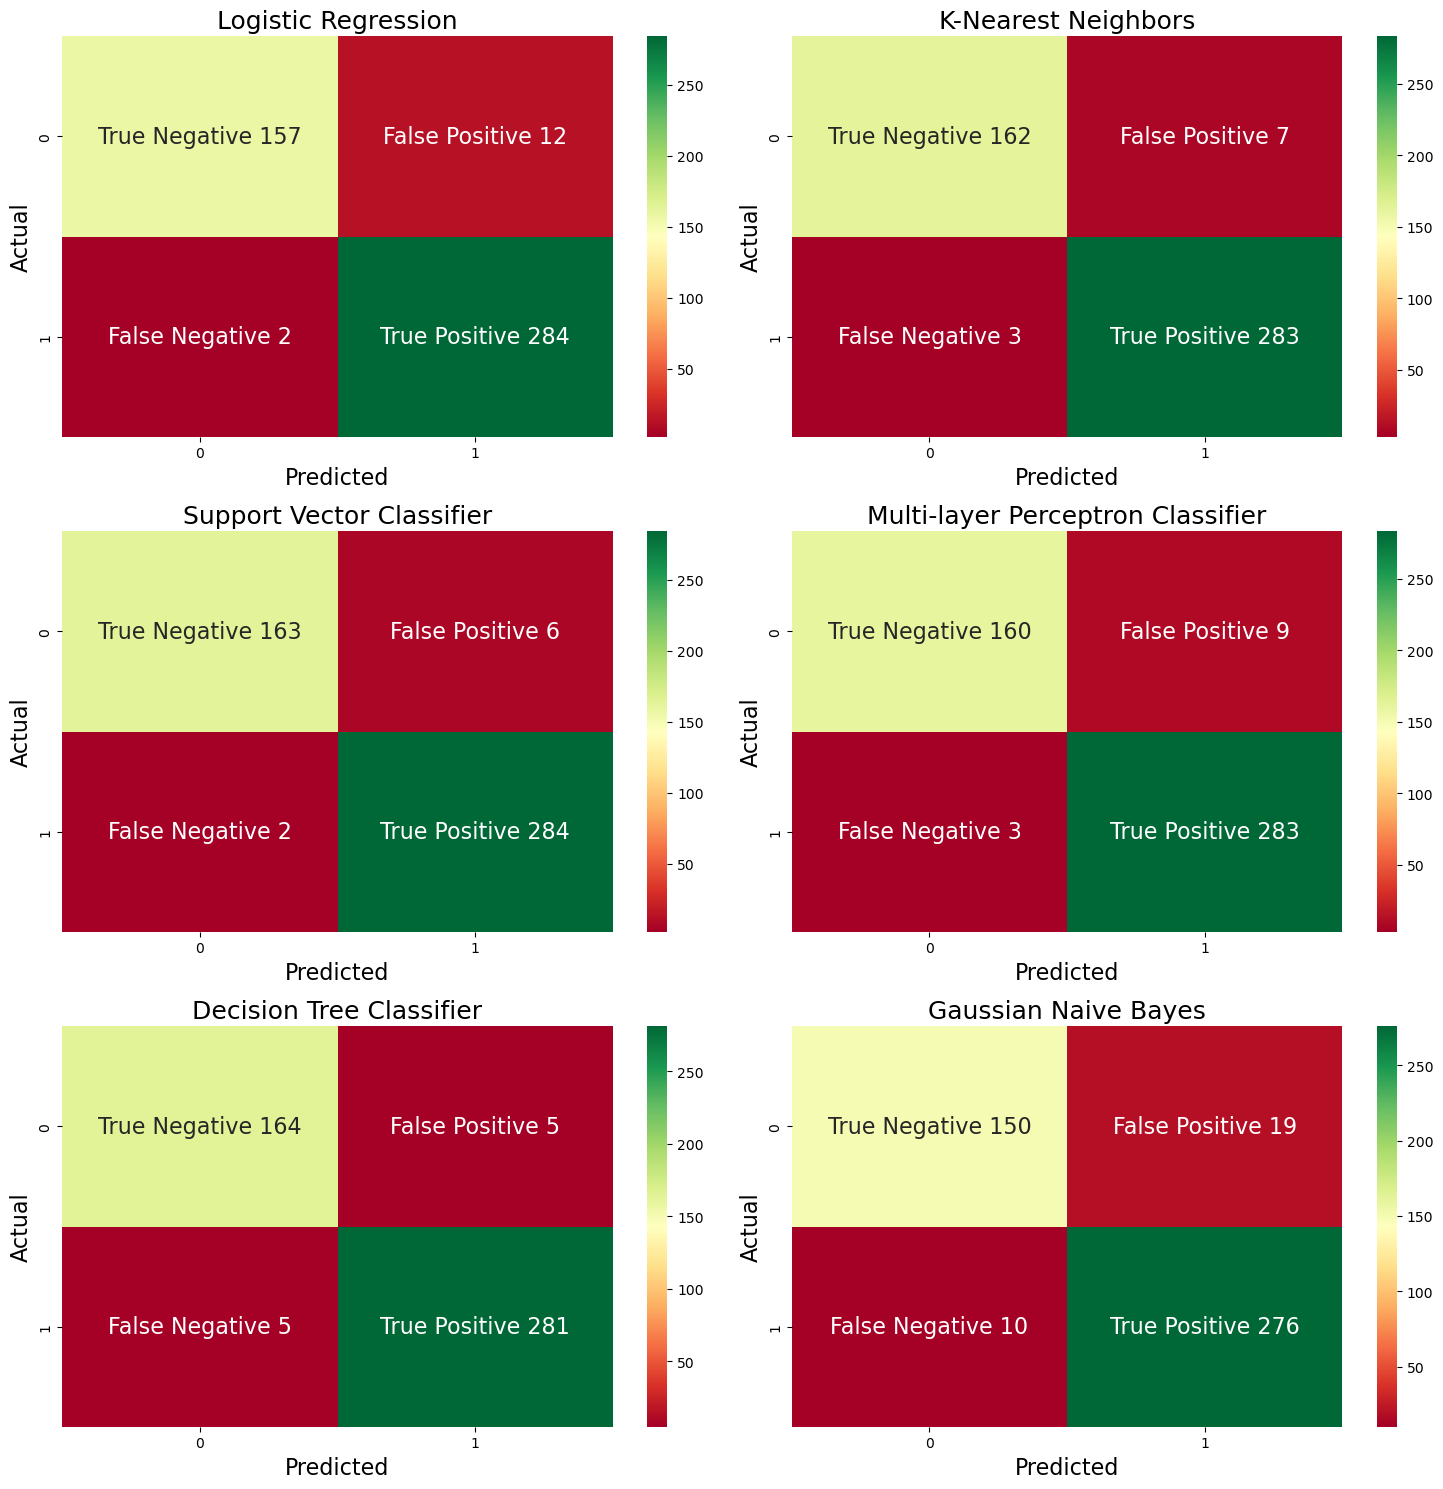

In [22]:
# let's visualize results in confusion matrices
# calculating the number of rows needed to contain 2 confusion matrices
num_classifiers = len(fitted_classifiers)
num_rows = (num_classifiers + 1) // 2

# сreating subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# if only one row - flatten axes
if num_rows == 1:
    axes = [axes]

# displaying confusion matricess for each clasifier
for idx, (name, classifier) in enumerate(fitted_classifiers.items()):
    # predicting on the test set
    y_train_pred = classifier.predict(X_train)
    
    # calculating confusion matrix
    cm = confusion_matrix(y_train, y_train_pred)
    ax = axes[idx // 2][idx % 2]
    results = cm
    strings = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
    labels = (np.asarray(["{0} {1:.0f}".format(string, value)
                          for string, value in zip(strings.flatten(), results.flatten())])
             ).reshape(2, 2)
    
    sns.heatmap(results, fmt="", cmap='RdYlGn', annot=labels, annot_kws={"size": 16}, ax=ax, cbar=True)
    ax.set_title(f'{name}', fontsize=18)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)

plt.tight_layout()
plt.show()

###### -- Try to improve classification result by adding Feature Selection preprocessing stage (before classification stage) using methods VarianceThreshold()

In [23]:
classifiers = {
    'Logistic Regression': LogisticRegression(C=1, max_iter=1000, solver='liblinear'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10, weights='distance'),
    'Support Vector Classifier': SVC(C=10, kernel='linear', gamma=0.001, probability=True),
    'Multi-layer Perceptron Classifier': MLPClassifier(max_iter=1000, activation='tanh', alpha=0.0001, hidden_layer_sizes=(50, 50, 50), solver='sgd'),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 1, min_samples_split = 5),
    'Gaussian Naive Bayes': GaussianNB(var_smoothing=1e-09)
}
    
from sklearn.feature_selection import VarianceThreshold

# adding Feature Selection with the VarianceThreshold() method
thresholdTrain = VarianceThreshold(threshold=0.02)
X_train_new = thresholdTrain.fit_transform(X_train)
X_test_new = thresholdTrain.fit_transform(X_test)

fitted_classifiers = {}

# cross-validation for each clasifier
for name, classifier in classifiers.items():
    print(f"\n{name}")
    
    classifier.fit(X_train_new, y_train)    
    fitted_classifiers[name] = classifier    
    cv_scores = cross_val_score(classifier, X_train_new, y_train, cv=5)
    
    print('Cross-validation scores (5 folds): {}'.format(cv_scores))
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
    print("Error:    %0.2f (+/- %0.2f)" % (1 - cv_scores.mean(), cv_scores.std() * 2))



Logistic Regression
Cross-validation scores (5 folds): [0.93406593 0.95604396 0.97802198 0.95604396 0.97802198]
Accuracy: 0.96 (+/- 0.03)
Error:    0.04 (+/- 0.03)

K-Nearest Neighbors
Cross-validation scores (5 folds): [0.94505495 0.96703297 0.97802198 0.98901099 0.95604396]
Accuracy: 0.97 (+/- 0.03)
Error:    0.03 (+/- 0.03)

Support Vector Classifier
Cross-validation scores (5 folds): [0.97802198 0.95604396 0.97802198 0.97802198 0.96703297]
Accuracy: 0.97 (+/- 0.02)
Error:    0.03 (+/- 0.02)

Multi-layer Perceptron Classifier
Cross-validation scores (5 folds): [0.96703297 0.94505495 0.95604396 0.95604396 0.96703297]
Accuracy: 0.96 (+/- 0.02)
Error:    0.04 (+/- 0.02)

Decision Tree Classifier
Cross-validation scores (5 folds): [0.92307692 0.94505495 0.92307692 0.96703297 0.93406593]
Accuracy: 0.94 (+/- 0.03)
Error:    0.06 (+/- 0.03)

Gaussian Naive Bayes
Cross-validation scores (5 folds): [0.92307692 0.95604396 0.93406593 0.92307692 0.95604396]
Accuracy: 0.94 (+/- 0.03)
Error:    

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

data = []

# predicting and evaluating on train and test sets
for name, classifier in fitted_classifiers.items():
    
    print(f"\n{name}")
    
    # predicting on a train set
    y_train_pred = classifier.predict(X_train_new)
    y_train_prob = classifier.predict_proba(X_train_new)[:, 1]  # Probability for ROC AUC
    
    # calculating metrics for a train set
    roc_auc_train = roc_auc_score(y_train, y_train_prob)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    report_train = classification_report(y_train, y_train_pred)
    
    print('Train set metrics:')
    print(f'ROC AUC: {roc_auc_train:.2f}')
    print(f'Accuracy: {accuracy_train:.2f}')
    print('Classification report:\n', report_train)
    
    # predicting on a test set
    y_test_pred = classifier.predict(X_test_new)
    y_test_prob = classifier.predict_proba(X_test_new)[:, 1]  # Probability for ROC AUC
    
    # calculating metrics for a test set
    roc_auc_test = roc_auc_score(y_test, y_test_prob)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred)
    
    print('\nTest set Mmetrics:')
    print(f'ROC AUC: {roc_auc_test:.2f}')
    print(f'Accuracy: {accuracy_test:.2f}')
    print('Classification report:\n', report_test)

    data.append([name, roc_auc_train, roc_auc_test, accuracy_train, accuracy_test])


Logistic Regression
Train set metrics:
ROC AUC: 0.99
Accuracy: 0.96
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       169
           1       0.95      0.99      0.97       286

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455


Test set Mmetrics:
ROC AUC: 1.00
Accuracy: 0.94
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


K-Nearest Neighbors
Train set metrics:
ROC AUC: 1.00
Accuracy: 1.00
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.0

In [25]:
# displaying the classification metrics in a data frame
columns = ['Classifier', 'Train ROC AUC', 'Test ROC AUC', 'Train Accuracy', 'Test Accuracy']
metrics_df = pd.DataFrame(data, columns=columns)
metrics_df.set_index('Classifier', inplace=True)
metrics_df

,Train ROC AUC,Test ROC AUC,Train Accuracy,Test Accuracy
Classifier,,,,
Logistic Regression,0.989986,0.995087,0.962637,0.938596
K-Nearest Neighbors,1.000000,0.984114,1.000000,0.938596
Support Vector Classifier,0.992841,0.991811,0.975824,0.964912
Multi-layer Perceptron Classifier,0.991890,0.994759,0.969231,0.947368
Decision Tree Classifier,0.999990,0.857353,0.997802,0.850877
Gaussian Naive Bayes,0.981897,0.990829,0.940659,0.956140


<b>In conclusion, Support Vector Classifier and Multi-layer Perceptron Classifier, continue to perform well overall. They're both good at accurately predicting the correct category. Logistic Regression and K-Nearest Neighbors are also performing well.</b>

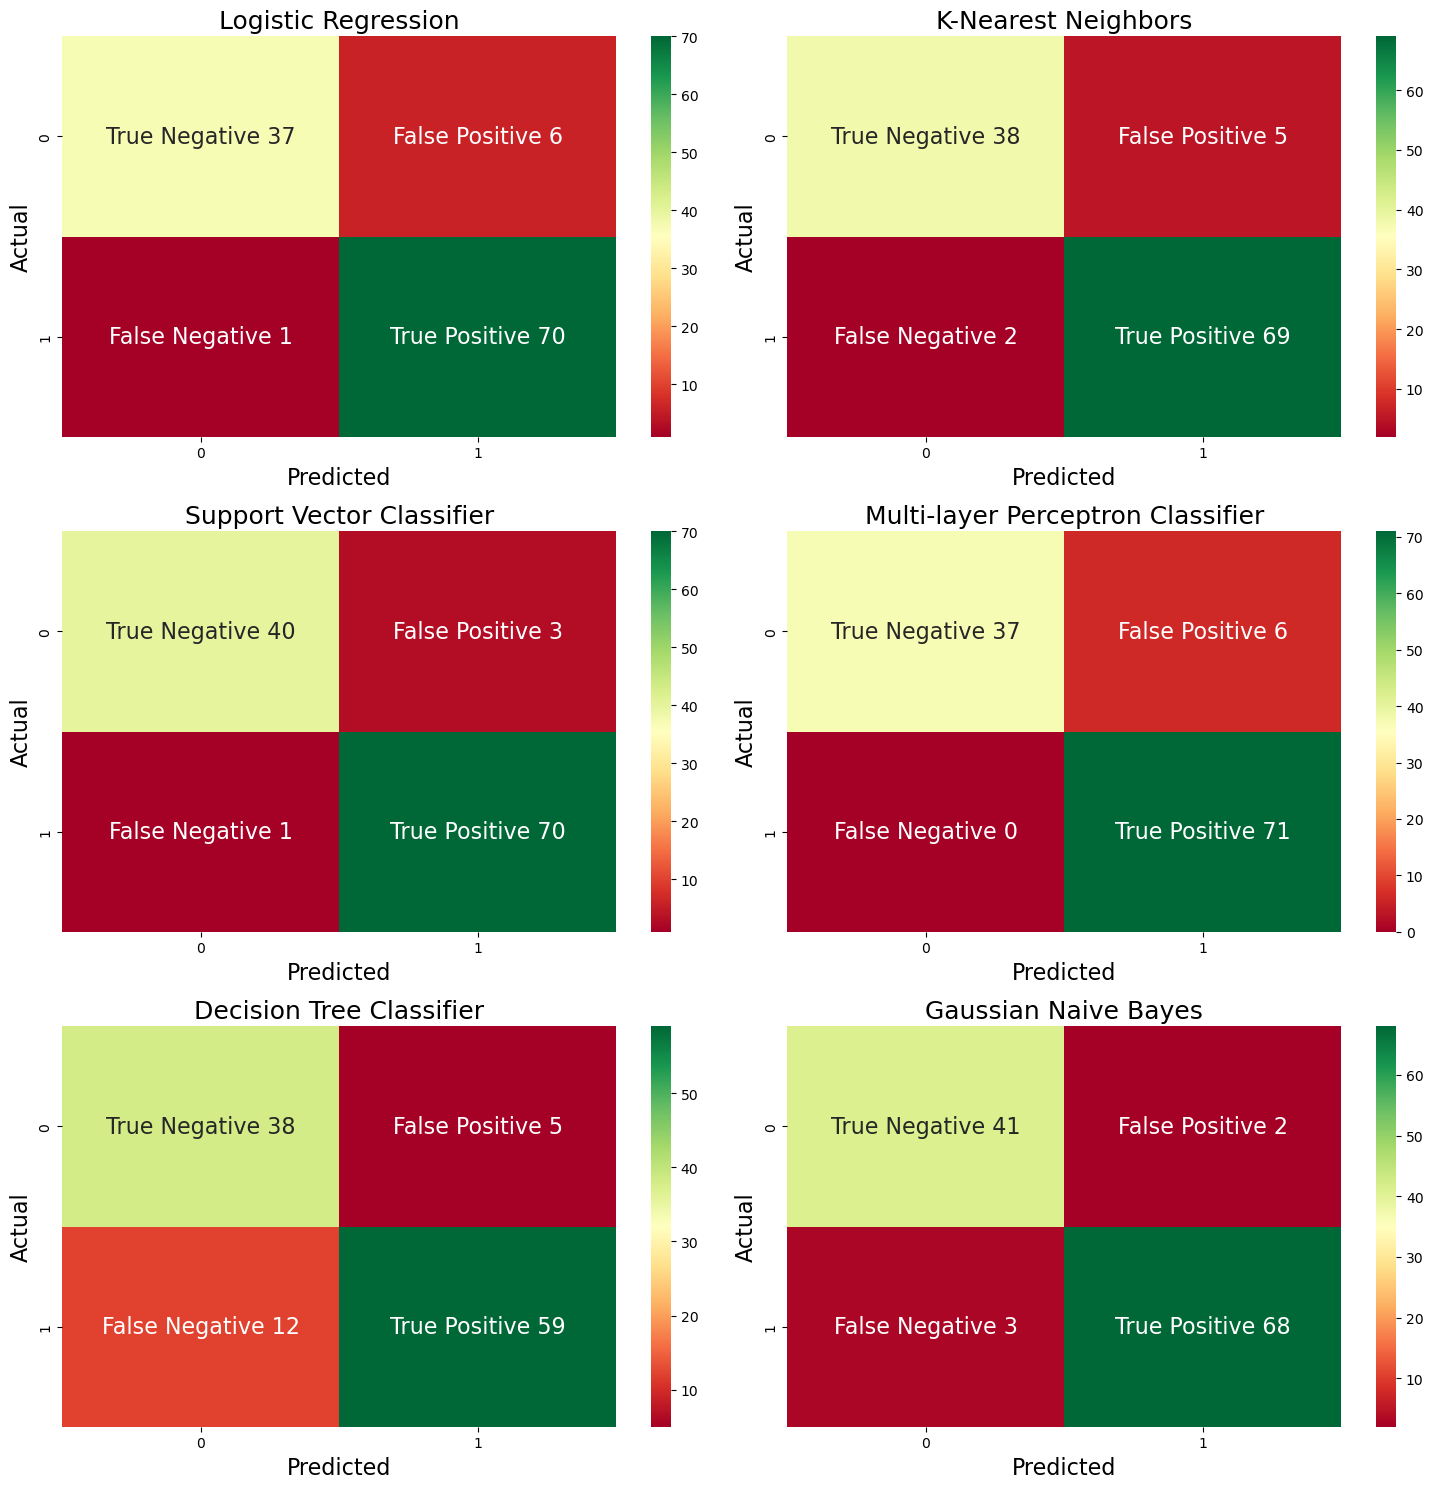

In [26]:
# let's visualize results in confusion matrices
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# calculating the number of rows needed to contain 2 confusion matrices
num_classifiers = len(fitted_classifiers)
num_rows = (num_classifiers + 1) // 2

# сreating subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# if only one row - flatten axes
if num_rows == 1:
    axes = [axes]

# displaying confusion matrices for each clasifier
for idx, (name, classifier) in enumerate(fitted_classifiers.items()):
    # predicting on the test set
    y_test_pred = classifier.predict(X_test_new)
    
    # calculating confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    ax = axes[idx // 2][idx % 2]
    results = cm
    strings = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
    labels = (np.asarray(["{0} {1:.0f}".format(string, value)
                          for string, value in zip(strings.flatten(), results.flatten())])
             ).reshape(2, 2)
    
    sns.heatmap(results, fmt="", cmap='RdYlGn', annot=labels, annot_kws={"size": 16}, ax=ax, cbar=True)
    ax.set_title(f'{name}', fontsize=18)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)

plt.tight_layout()
plt.show()

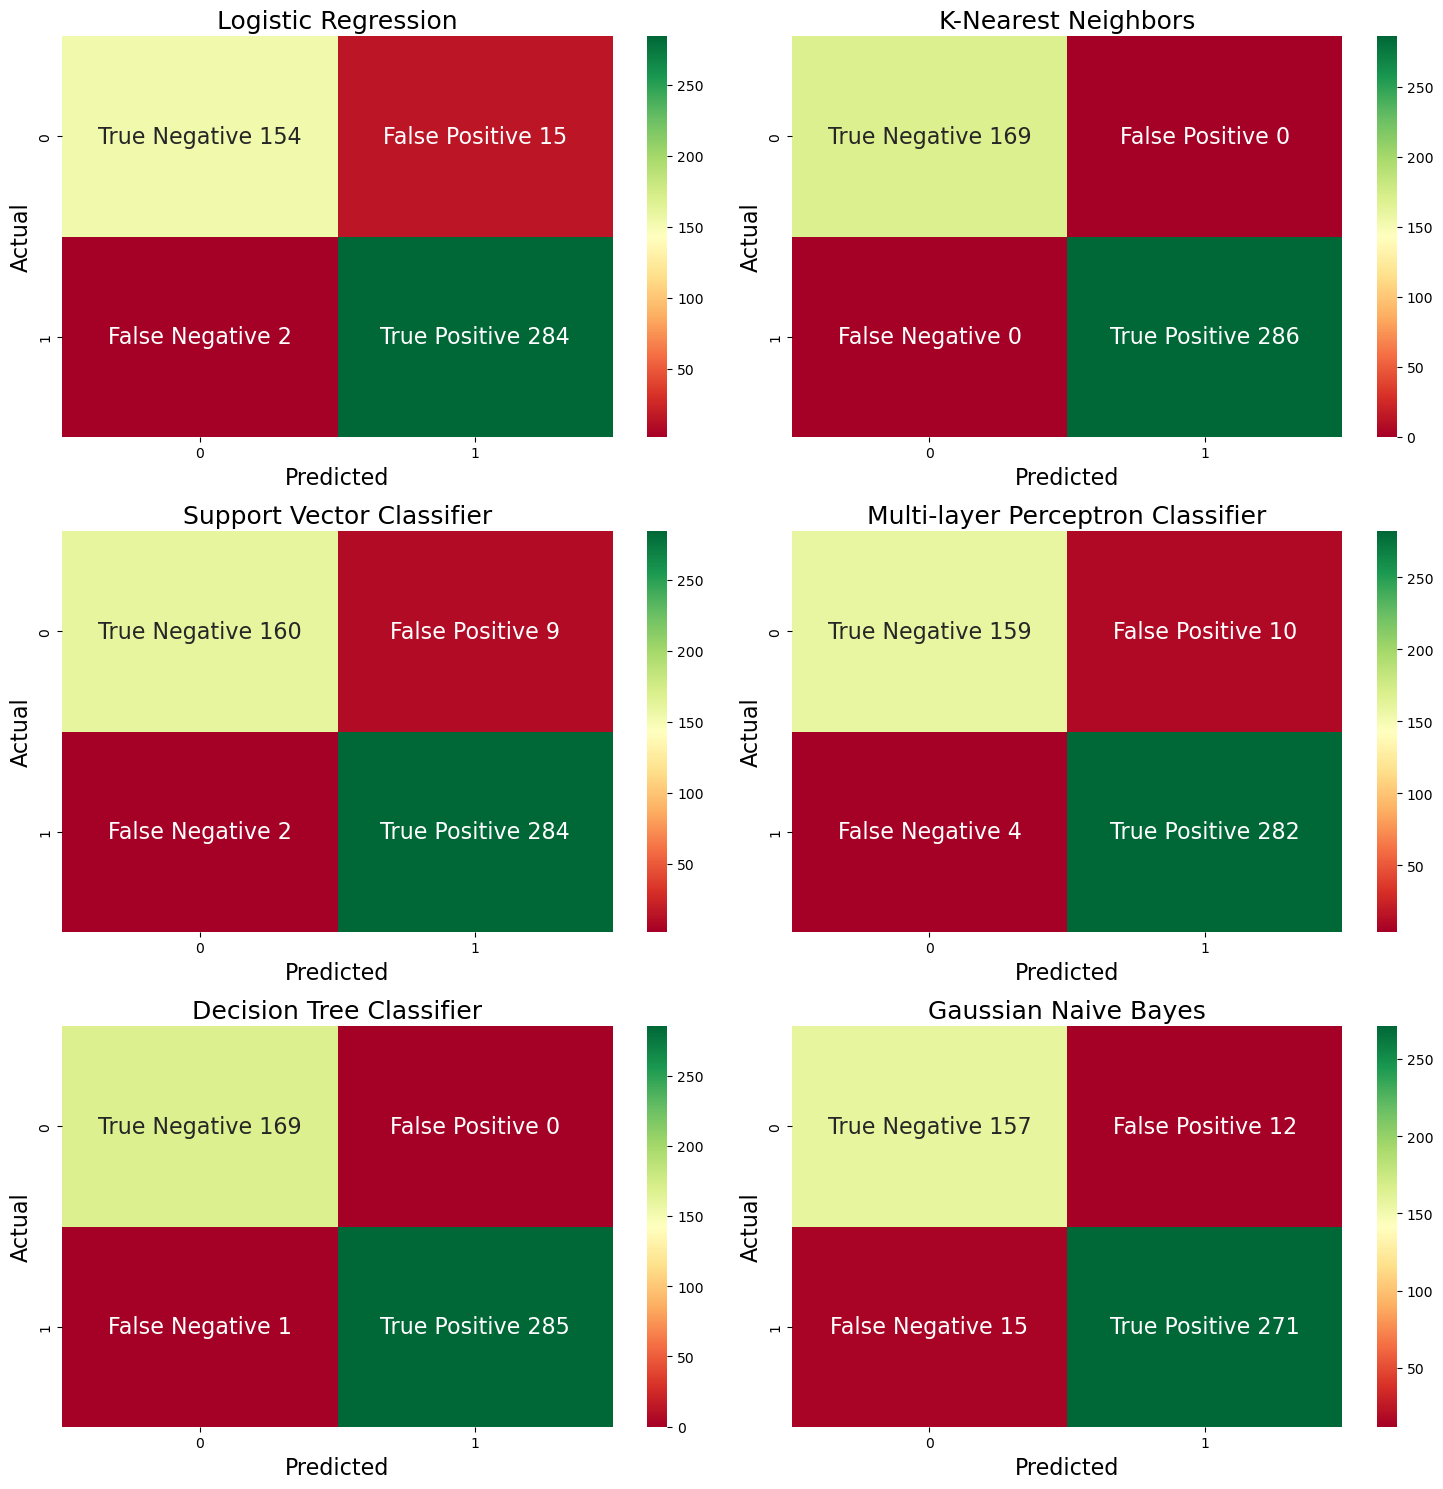

In [27]:
# let's visualize results in confusion matrices
# calculating the number of rows needed to contain 2 confusion matrices
num_classifiers = len(fitted_classifiers)
num_rows = (num_classifiers + 1) // 2  # Ensure at least one row

# сreating subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# if only one row - flatten axes
if num_rows == 1:
    axes = [axes]

# displaying confusion matrices for each clasifier
for idx, (name, classifier) in enumerate(fitted_classifiers.items()):
    # predicting on the test set
    y_train_pred = classifier.predict(X_train_new)
    
    # calculating confusion matrix
    cm = confusion_matrix(y_train, y_train_pred)
    ax = axes[idx // 2][idx % 2]
    results = cm
    strings = np.asarray([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
    labels = (np.asarray(["{0} {1:.0f}".format(string, value)
                          for string, value in zip(strings.flatten(), results.flatten())])
             ).reshape(2, 2)
    
    sns.heatmap(results, fmt="", cmap='RdYlGn', annot=labels, annot_kws={"size": 16}, ax=ax, cbar=True)
    ax.set_title(f'{name}', fontsize=18)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)

plt.tight_layout()
plt.show()